# SI 618: Pivoting, contingency tables, crosstabs, mosaic plots and chi-squared

In [ ]:
MY_UNIQNAME = 'huangmy'

## Outline for today
* Project proposal review (https://docs.google.com/document/d/1sAwmJvgPcFkl5QiwbdXND1yBpIqQfVCOVhqvyN9RX5g/edit#)
* Pivoting, stacking, and unstacking in pandas
* Contingency tables, crosstabs, mosaic plots, chi-squared: introduction
* Lab component

In [1]:
# load a few libraries we'll need

%matplotlib inline
import pandas as pd
import random
import numpy as np
from random import sample

# Pivots/Stack/Unstack Intro
The following cells are based on: 
http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/

In [2]:
from collections import OrderedDict
from pandas import DataFrame

table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item1', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
metal = DataFrame(table)
metal

# create the table

,Item,CType,USD,EU
0,Item0,Gold,1$,1€
1,Item0,Bronze,2$,2€
2,Item1,Gold,3$,3€
3,Item1,Silver,4$,4€


In [6]:
# make a table of items (rows) and costs (USD) 
# for each in gold and bronze
metal.pivot(index='Item',columns='CType',values='USD')

# see the image below... we're telling Pandas to take the table above, create a row for every item. 
# This is done by setting index to Item (the column in the original table that contains item names)
# We then are telling pandas we want to create a column for every unique element in the
# original CType column.  And finally, we want the value in the cells to be the value from the USD
# column in the original table.

CType,Bronze,Gold,Silver
Item,,,
Item0,2$,1$,NaN
Item1,NaN,3$,4$


![pivot 1](http://nikgrozev.com/images/blog/Reshaping%20in%20Pandas%20-%20Pivot%20Pivot-Table%20Stack%20and%20Unstack%20explained%20with%20Pictures/pivoting_simple1.png "pivots")

In [7]:
p = metal.pivot(index='Item',columns='CType',values='USD')  # same as above, I'm just remembering the pivot as "p"

# Access the USD cost of Item0 for Gold customers
# first we find the row for Item0/Gold and then we select the USD column and pull out the value
result = metal[((metal.Item == 'Item0') & (metal.CType == 'Gold'))].USD

In [8]:
type(result)

pandas.core.series.Series

In [9]:
# same thing on pivoted table

# here we pull out the row for Item0, grab the Gold column and print the value
p[p.index == 'Item0'].Gold.values

array(['1$'], dtype=object)

In [10]:
# pivot by multiple columns, I want USD and EU prices

In [11]:
metal.pivot(index='Item',columns='CType')

USD                 EU            
CType Bronze Gold Silver Bronze Gold Silver
Item                                       
Item0     2$   1$    NaN     2€   1€    NaN
Item1    NaN   3$     4$    NaN   3€     4€

In [12]:
# Access the USD cost of Item0 for Gold customers
p = metal.pivot(index='Item',columns='CType')
#p.USD
p.USD[p.USD.index == 'Item0'].Gold.values

# The same Item and CType lead to different USD values -- conflict

array(['1$'], dtype=object)

![pivot 2](http://nikgrozev.com/images/blog/Reshaping%20in%20Pandas%20-%20Pivot%20Pivot-Table%20Stack%20and%20Unstack%20explained%20with%20Pictures/pivoting_simple_error.png "pivots")

In [1]:
# What happens if there is a collision? see the problem?  There are two Item0/Golds (see image above)
"""
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  ['1$', '2$', '3$', '4$']),
    ('EU',   ['1€', '2€', '3€', '4€'])
))
metal = DataFrame(table)
p = metal.pivot(index='Item', columns='CType', values='USD')
"""
# will return an error

'\ntable = OrderedDict((\n    ("Item", [\'Item0\', \'Item0\', \'Item0\', \'Item1\']),\n    (\'CType\',[\'Gold\', \'Bronze\', \'Gold\', \'Silver\']),\n    (\'USD\',  [\'1$\', \'2$\', \'3$\', \'4$\']),\n    (\'EU\',   [\'1€\', \'2€\', \'3€\', \'4€\'])\n))\nmetal = DataFrame(table)\np = metal.pivot(index=\'Item\', columns=\'CType\', values=\'USD\')\n'

## pivot_tables is your friend
![pivot 1](http://nikgrozev.com/images/blog/Reshaping%20in%20Pandas%20-%20Pivot%20Pivot-Table%20Stack%20and%20Unstack%20explained%20with%20Pictures/pivoting_table_simple1.png "pivots")

 Aggregation: Mean value will help solve the conflict problems -- that is to take the mean of conflict. Else/max/min etc.

In [13]:
# let's create a table to play with
table = OrderedDict((
    ("Item", ['Item0', 'Item0', 'Item0', 'Item1']),
    ('CType',['Gold', 'Bronze', 'Gold', 'Silver']),
    ('USD',  [1, 2, 3, 4]),
    ('EU',   [1.1, 2.2, 3.3, 4.4])
))
metal = DataFrame(table)
metal

,Item,CType,USD,EU
0,Item0,Gold,1,1.1
1,Item0,Bronze,2,2.2
2,Item0,Gold,3,3.3
3,Item1,Silver,4,4.4


In [15]:
# pivot_table is  a bit different than pivot... It's the same with the first part
# index, columns, values remain the same as before BUT we added a rule (aggfunc)
# that says: whey you hit a conflict, the way to resolve it is X (in this case
# x is the "mean"... so find the mean of the two numbers)
p = metal.pivot_table(index='Item',columns='CType',values='USD',aggfunc=np.max)
p

CType,Bronze,Gold,Silver
Item,,,
Item0,2.0,3.0,NaN
Item1,NaN,NaN,4.0


In [16]:
# you could have also resolved the conflict in other ways.  Here we tell it
# to take the "min"
p = metal.pivot_table(index='Item',columns='CType',values='USD',aggfunc=np.median)
p

CType,Bronze,Gold,Silver
Item,,,
Item0,2.0,2.0,NaN
Item1,NaN,NaN,4.0


In [17]:
# pivots are a specific form of stack/unstack, but more on this later

![pivot 1](http://nikgrozev.com/images/blog/Reshaping%20in%20Pandas%20-%20Pivot%20Pivot-Table%20Stack%20and%20Unstack%20explained%20with%20Pictures/stack-unstack1.png "pivots")

## A worked example

In [25]:
# to start let's make a fake dataset: sales of fruit across US states.
# Don't worry about the details here, but basically we'll pretend
# this string is a CSV file and use the standard loading ops
from io import StringIO

# treat it as csv files and use StringIO to read as dataframe
TESTDATA=StringIO("""State,Retailer,Fruit,Sales
MI,Walmart,Apple,100
MI,Wholefoods,Apple,150
MI,Kroger,Orange,180
CA,Walmart,Apple,220
CA,Wholefoods,Apple,180
CA,Safeway,Apple,220
CA,Safeway,Orange,110
NY,Walmart,Apple,90
NY,Walmart,Orange,80
NY,Wholefoods,Orange,120
""")

fruit = pd.DataFrame.from_csv(TESTDATA, index_col=None)
fruit

C:\Users\TK\Anaconda\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


,State,Retailer,Fruit,Sales
0,MI,Walmart,Apple,100
1,MI,Wholefoods,Apple,150
2,MI,Kroger,Orange,180
3,CA,Walmart,Apple,220
4,CA,Wholefoods,Apple,180
5,CA,Safeway,Apple,220
6,CA,Safeway,Orange,110
7,NY,Walmart,Apple,90
8,NY,Walmart,Orange,80
9,NY,Wholefoods,Orange,120


## (a) What is the total sales for each state?
This requires us to group by state, and aggregate sales by taking the sum.

The easiest way of doing this if to use `groupby`

If you execute groupby on the dataframe what you'll get back is an object called DataFrameGroupBy

In [26]:
fruit.groupby('State')

On its own it's a bit useless... it just keeps track of which rows should go into each "pile" (where pile here means a unique group for each state)

If we ask this object to describe itself, you can see what is inside notice that it threw away all the other columns because they were not numerical.  Only "Sales" which is a number, was kept

In [27]:
fruit.groupby('State').describe()

Sales                                                          
      count        mean        std    min    25%    50%    75%    max
State                                                                
CA      4.0  182.500000  51.881275  110.0  162.5  200.0  220.0  220.0
MI      3.0  143.333333  40.414519  100.0  125.0  150.0  165.0  180.0
NY      3.0   96.666667  20.816660   80.0   85.0   90.0  105.0  120.0

Now, if we had another numerical column, let's call it "Sales2," that column would also be kept.  Let's make a fruit2 DataFrame so you can see that:

In [28]:
from io import StringIO

TESTDATA=StringIO("""State,Retailer,Fruit,Sales,Sales2
MI,Walmart,Apple,100,10
MI,Wholefoods,Apple,150,20
MI,Kroger,Orange,180,30
CA,Walmart,Apple,220,20
CA,Wholefoods,Apple,180,40
CA,Safeway,Apple,220,30
CA,Safeway,Orange,110,20
NY,Walmart,Apple,90,40
NY,Walmart,Orange,80,20
NY,Wholefoods,Orange,120,60
""")

fruit2 = pd.read_csv(TESTDATA, index_col=None)
fruit2

,State,Retailer,Fruit,Sales,Sales2
0,MI,Walmart,Apple,100,10
1,MI,Wholefoods,Apple,150,20
2,MI,Kroger,Orange,180,30
3,CA,Walmart,Apple,220,20
4,CA,Wholefoods,Apple,180,40
5,CA,Safeway,Apple,220,30
6,CA,Safeway,Orange,110,20
7,NY,Walmart,Apple,90,40
8,NY,Walmart,Orange,80,20
9,NY,Wholefoods,Orange,120,60


In [29]:
fruit2.groupby("State").describe()

Sales                                                           Sales2  \
      count        mean        std    min    25%    50%    75%    max  count   
State                                                                          
CA      4.0  182.500000  51.881275  110.0  162.5  200.0  220.0  220.0    4.0   
MI      3.0  143.333333  40.414519  100.0  125.0  150.0  165.0  180.0    3.0   
NY      3.0   96.666667  20.816660   80.0   85.0   90.0  105.0  120.0    3.0   

                                                      
       mean        std   min   25%   50%   75%   max  
State                                                 
CA     27.5   9.574271  20.0  20.0  25.0  32.5  40.0  
MI     20.0  10.000000  10.0  15.0  20.0  25.0  30.0  
NY     40.0  20.000000  20.0  30.0  40.0  50.0  60.0

To actually make use of the groupby, we need to tell pandas what to use to measure what's in each group. In other words, I've created a pile for California, a pile for Michigan, and a pile for New York.  I want a number to what's *inside* each pile.  I could ask for the "size" (so how many rows are in each pile), or I could calculate some mathematical function.  For example, if I wanted to know the total sales, I would call "sum."  What happens is pandas goes through every pile, looks at every "row" inside that pile and, for all numerical properties, calculated something.  In this case it's sum... it adds up everything.  So in our original table we had three items for Michigan (Walmart, Kroger, Wholefoods).  This is our Michigan pile.  We then look at numerical properties for Walmart, Kroger, and Wholefoods. In this case Sales.  Because we are using sum() that means add the sales of each.

In [30]:
# What are the total sales for each state?
fruit.groupby('State').sum()  # instead of size()

,Sales
State,
CA,730
MI,430
NY,290


What just happend? A couple of things:
- `groupby()` got first executed on `df`, returning an `DataFrameGroupBy` object. This object itself is useless unless coupled with an aggregation function, such as `sum()`, `mean()`, `max()`, `apply()`. We will talk about `apply()` more in the next week.
- Then, `sum()` got executed on the `DataFrameGroupBy` object, generating the `DataFrame` object you see above. Notice how the table looks different than the original DataFrame `df`? Here are the differences:
  - The `State` column now becomes the index of the DataFrame. The string "State" is the name of the index. Notice how the index name is displayed on a lower level than column names.
  - Since we performed a `groupby` operation by `State`, so only the unique values of `State` are kept as index.
  - Among the other columns, Retailer, Fruit, and Sales, only Sales is kept in the result table. This is because the aggregation function `sum()` only knows how to aggregate numerical values. And only Sales is a numerical column. The other columns are hence dropped.
  
## (b) What is the total sales for each state for each fruit?
This requires us to perform `groupby` on two columns. So, we provide a list of column names to the `groupby` function.

Don't forget that an aggregation function needs to follow the `groupby` function in order to generate results.

In [31]:
# What is the total sales for each state for each fruit?
fruit.groupby(['State','Fruit']).sum()

Sales
State Fruit        
CA    Apple     620
      Orange    110
MI    Apple     250
      Orange    180
NY    Apple      90
      Orange    200

How is this DataFrame different from the previous one?

The biggest different is that this DataFrame has what is called a `MultiIndex` (or hierarchical index), as opposed to a simple index. In this table, the left two "columns" are not columns but actually part of the `MultiIndex`, and the `Sales` is the single real "column" in the DataFrame. (Running out of terminologies here...)

The hierarchical index can be organized in an alternative way if we swapped the order of State and Fruit.

In [32]:
fruit.groupby(['Fruit','State']).sum()

Sales
Fruit  State       
Apple  CA       620
       MI       250
       NY        90
Orange CA       110
       MI       180
       NY       200

## (c) Which state has the maximum total sales?
This question is not asking about the maximum value, but rather which state holds that maximum. There are multiple ways to do it. A principled way is to use `argmax`.

In [34]:
# Which state has the maximum total sales?
fruitSalesByState = fruit.groupby('State').sum()
fruitSalesByState
np.argmax(fruitSalesByState.Sales)


C:\Users\TK\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


'CA'

Two things happend in the above command:
- In the parentheses, by doing `df_sales_by_state.Sales`, I am selecting the `Sales` column of the DataFrame. This will result in a `pandas.Series` object. Note that `Series` objects have indexes, just as `DataFrames`.
- An equivalent way of doing the selection is by `df_sales_by_state['State']`. There is no difference.
- Then, this `Series` object is passed to `numpy`'s `argmax` function, which returns the label (from the index of the `Series` object) of the row that has the maximum value.

What if I want to display the maximum value alongside the state? Well, we can use that returned label to _select_ the corresponding row from the original DataFrame.

In [35]:
# the deets
fruitSalesByState.loc['CA']

Sales    730
Name: CA, dtype: int64

In [36]:
# Which state has the maximum total sales for apples?
# give me apple sellers
apples = fruit[fruit.Fruit == 'Apple']
# aggr. by state
applesByState = apples.groupby('State').sum()
# double bracket for dataframe (single for series)
applesByState.loc[[np.argmax(applesByState.Sales)]]

C:\Users\TK\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


,Sales
State,
CA,620


In the above command, `.loc()` is a function of `DataFrame`. It looks up the index label and returns that row.

The reason I use double square brackets instead of a single pair above is to obtain a `DataFrame` instead of a `Series`, just so that it looks nicer.

## Which state has the biggest difference of sales between apples and oranges?</font>
 (i.e., `abs(#apples-#oranges`))

My solution:
- Step 1: Obtain a table where the rows are states, the columns are fruits, and the cells are total sales (aggregated across retailers).
  - One easy way of doing this is to create pivot table.
  - When creating a pivot table, you will need to always be sharp clear in your mind about three elements:
    - what will be the rows? (This corresponds to the `index` parameter in the `pivot_table` function)
    - what will be the columns?
    - what will be the aggregation functions (hence the meaning of the values)?
- Step 2. Compute absolute difference
- Step 3. Select the state that has the maximum absolute different by applying `np.argmax()`.

In [37]:
# Which state has the biggest difference of sales between apples and oranges?
# (i.e., abs(#apples-#oranges)

# use the aggregation function sum to get the whole values in Fruit columns
fruitPivot = fruit.pivot_table(index='State',columns='Fruit',
                               aggfunc="sum")
fruitPivot

Sales       
Fruit Apple Orange
State             
CA      620    110
MI      250    180
NY       90    200

As you can see, a pivot table is just another `DataFrame`, with slightly more complex indexes and columns.

Let's break this down:
- This `DataFrame` has a simple `Index`. The name of the `Index` is `State`, exactly as we dictated.
- The `columns` of this table is itself a `MultiIndex` (hierarchical index) with two levels.
  - The first level has only one label, "Sales". This level has no name.
  - The second level has two labels, "Apple", and "Orange". This level has a name, "Fruit".

This can be seen by using the commands below.

In [38]:
fruitPivot.columns # give me the heading/multiindex at top

MultiIndex(levels=[['Sales'], ['Apple', 'Orange']],
           labels=[[0, 0], [0, 1]],
           names=[None, 'Fruit'])

In [193]:
# get the difference first
np.abs(fruitPivot['Sales']['Apple'] - 
       fruitPivot['Sales']['Orange'])

# check the location and return to get max
np.argmax(np.abs(fruitPivot['Sales']['Apple'] - 
       fruitPivot['Sales']['Orange']))

C:\Users\TK\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


'CA'

## (e) Which 2 retailers have the highest total sales in the eastern time zone?
My solution:
- Step 1: Select sale records for Eastern Time Zone states only.
- Step 2: Group by retailers and sum (implying that we will aggregate sales across states)
- Step 3: Sort rows by total sales and select top 2 rows

In [41]:
# Which 2 retailers have the highest total sales in the east coast?
fruitEastern = fruit[fruit.State.isin(['MI','NY'])]
fruitEasternRet = fruitEastern.groupby('Retailer').sum()
fruitEasternRet.sort_values('Sales', ascending=False).head(2)

,Sales
Retailer,
Walmart,270
Wholefoods,270


Note that the parameter in `sort_values`, `ascending=False` means we want the rows to be ordered in descending order.

## Contingency tables, crosstabs, and chi-square

In [42]:
import pandas as pd
import numpy as np

Let's generate a data frame to play with:

In [44]:
df = pd.DataFrame({'color' : ['red', 'green', 'green', 'black'] * 6,
                   'make' : ['ford', 'toyota', 'dodge'] * 8,
                   'vehicleClass' : ['suv', 'suv', 'suv', 'car', 'car', 'truck'] * 4})

In [47]:
df.head(10)

,color,make,vehicleClass
0,red,ford,suv
1,green,toyota,suv
2,green,dodge,suv
3,black,ford,car
4,red,toyota,car
5,green,dodge,truck
6,green,ford,suv
7,black,toyota,suv
8,red,dodge,suv
9,green,ford,car


One of the most basic transformations we can do is a crosstab.  Notice how similar it is to pivoting.

In [205]:
ct = pd.crosstab(df.color, df.vehicleClass)
ct

vehicleClass,car,suv,truck
color,,,
black,2,2,2
green,4,6,2
red,2,4,0


As usual, we would like to visualize our results:

In [49]:
import seaborn as sns

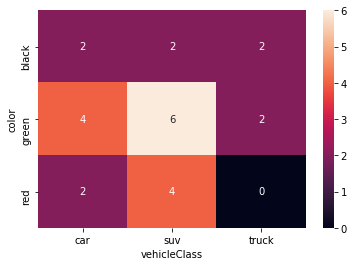

In [51]:
sns.heatmap(ct, annot=True)

### Titanic data

One of the more popular datasets that we use for experimenting with crosstabs is the 
survivor data from the Titanic disaster:

In [93]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,passtype,age,status,sex
0,third,child,dead,male
1,third,child,dead,male
2,third,child,dead,male
3,third,child,dead,male
4,third,child,dead,male


Let's create a crosstab of the data:

In [233]:
ct = pd.crosstab(titanic.passtype,titanic.status)
ct

status,alive,dead
passtype,,
crew,212,673
first,203,122
second,118,167
third,178,528


Now let's use our knowledge of data manipulation with pandas to generate some marginal totals:

### Q1: Generate this:

![](resources/samplect.png)

### End Q1


In [234]:
ct = pd.crosstab(titanic.passtype,titanic.status)
# add total in row and column
ctExt = ct.copy()
print(ctExt.sum(axis=1))
ctExt['total'] = ctExt.sum(axis=1) # calculate the row-wise sum
print(ctExt.sum(axis=0))
ctExt.loc['total'] = ctExt.sum(axis=0)
# calculate percents for each column
alivePercent = np.round(ctExt.alive/ctExt.total * 100,decimals=2)
deadPercent = np.round(ctExt.dead/ctExt.total * 100,decimals=2)
totalPercent = np.round(ctExt.total/ctExt.total * 100,decimals=2)
detailCT = ctExt.copy()

detailCT.alive = ctExt.alive.astype('str') + " (" + alivePercent.astype('str') + "%)"
detailCT.dead = ctExt.dead.astype('str') + " (" + deadPercent.astype('str') + "%)"
detailCT.total = ctExt.total.astype('str') + " (" + totalPercent.astype('str') + "%)"
detailCT

passtype
crew      885
first     325
second    285
third     706
dtype: int64
status
alive     711
dead     1490
total    2201
dtype: int64


status,alive,dead,total
passtype,,,
crew,212 (23.95%),673 (76.05%),885 (100.0%)
first,203 (62.46%),122 (37.54%),325 (100.0%)
second,118 (41.4%),167 (58.6%),285 (100.0%)
third,178 (25.21%),528 (74.79%),706 (100.0%)
total,711 (32.3%),1490 (67.7%),2201 (100.0%)


### Q2: Is this what we would have expected?

In [235]:
# fill in the correct numbers on the next two lines (where .00 is right now)
expectedAlive = ctExt.total * 0.323
expectedDead = ctExt.total * 0.677
expectedAlive

passtype
crew      285.855
first     104.975
second     92.055
third     228.038
total     710.923
Name: total, dtype: float64

### End Q2

Now generate a similar matrix for the *expected* (as oppposed to observed) values:

In [236]:
ctExpected = ct.copy()
ctExpected.alive = expectedAlive
ctExpected.dead = expectedDead
ctExpected['total'] = ctExpected.sum(axis=1)
ctExpected.loc['total'] = ctExpected.sum(axis=0)
print(ctExpected)

# calculate percents for each column
alivePercent = np.round(ctExpected.alive/ctExpected.total * 100,decimals=2)
deadPercent = np.round(ctExpected.dead/ctExpected.total * 100,decimals=2)
totalPercent = np.round(ctExpected.total/ctExpected.total * 100,decimals=2)

detailExp = ctExpected.copy()
detailExp.alive = ctExpected.alive.astype('str') + " (" + alivePercent.astype('str') + "%)"
detailExp.dead = ctExpected.dead.astype('str') + " (" + deadPercent.astype('str') + "%)"
detailExp.total = ctExpected.total.astype('str') + " (" + totalPercent.astype('str') + "%)"

status      alive      dead   total
passtype                           
crew      285.855   599.145   885.0
first     104.975   220.025   325.0
second     92.055   192.945   285.0
third     228.038   477.962   706.0
total     710.923  1490.077  2201.0


In [237]:
detailExp

status,alive,dead,total
passtype,,,
crew,285.855 (32.3%),599.1450000000001 (67.7%),885.0000000000001 (100.0%)
first,104.97500000000001 (32.3%),220.025 (67.7%),325.0 (100.0%)
second,92.055 (32.3%),192.94500000000002 (67.7%),285.0 (100.0%)
third,228.038 (32.3%),477.96200000000005 (67.7%),706.0 (100.0%)
total,710.923 (32.3%),1490.0770000000002 (67.7%),2201.0 (100.0%)


In [238]:
detailCT

status,alive,dead,total
passtype,,,
crew,212 (23.95%),673 (76.05%),885 (100.0%)
first,203 (62.46%),122 (37.54%),325 (100.0%)
second,118 (41.4%),167 (58.6%),285 (100.0%)
third,178 (25.21%),528 (74.79%),706 (100.0%)
total,711 (32.3%),1490 (67.7%),2201 (100.0%)


In addition to the heatmap shown above, we can use a mosaic plot to visualize 
contingency tables:

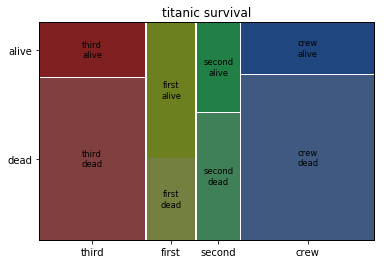

In [239]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(titanic, ['passtype','status'],title='titanic survival')

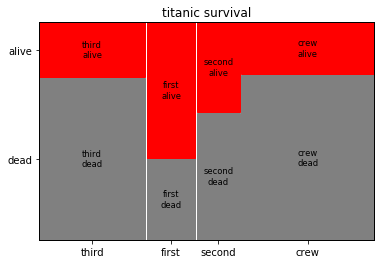

In [240]:
# slightly easier to read
props = lambda key: {'color': 'r' if 'alive' in key else 'gray'}
t = mosaic(titanic, ['passtype','status'],title='titanic survival',properties=props)

Finally, we can go beyond visual exploration and apply analytic tests to see if the 
observed values differ from the expected ones.  The chi-square test sums the squares of the differences
between the observed and expected values, normalized for the expected values.

In [241]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  190.4011036168333
p-val =  4.999927529867932e-41
degree of freedom =  3
Expected:


,0,1
0,285.885961,599.114039
1,104.986370,220.013630
2,92.064970,192.935030
3,228.062699,477.937301


## Lab component (on your own)

In [242]:
import pandas as pd

For this component, we'll use the Comic Characters data set:

In [243]:
comic_characters = pd.read_csv("data/comic_characters.csv", index_col="id")
comic_characters.head(1)

,publisher,name,Identity,align,eye,hair,sex,alive,appearances,first_appearance,month,year,date
id,,,,,,,,,,,,,
1,Marvel,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,"1962, August",August,1962.0,8/1/1962


### Example

We'd like to know which publisher uses different 'identity' types for their characters? Have DC characters appeared more publicly? What is the average number of times Marvel Characters appeared known to authorities identity?

In [244]:
comic_characters.groupby('publisher').describe()

appearances                                                     \
                count       mean        std  min  25%  50%   75%     max   
publisher                                                                  
DC             6541.0  23.625134  87.378509  1.0  2.0  6.0  15.0  3093.0   
Marvel        15280.0  17.033377  96.372959  1.0  1.0  3.0   8.0  4043.0   

              year                                                          \
             count         mean        std     min     25%     50%     75%   
publisher                                                                    
DC          6827.0  1989.766662  16.824194  1935.0  1983.0  1992.0  2003.0   
Marvel     15561.0  1984.951803  19.663571  1939.0  1974.0  1990.0  2000.0   

                   
              max  
publisher          
DC         2013.0  
Marvel     2013.0

In [245]:
comic_characters.groupby(['Identity', 'publisher']).appearances.describe()

count       mean         std  min  \
Identity                      publisher                                       
Identity Unknown              DC            9.0   3.000000    4.330127  1.0   
Known to Authorities Identity Marvel       15.0  74.400000  112.960676  2.0   
No Dual Identity              Marvel     1689.0  24.402013  107.182232  1.0   
Public Identity               DC         2361.0  28.287166   81.652393  1.0   
                              Marvel     4281.0  23.407615  141.738933  1.0   
Secret Identity               DC         2288.0  32.655157  120.487123  1.0   
                              Marvel     5919.0  17.379794   77.300955  1.0   

                                         25%   50%   75%     max  
Identity                      publisher                           
Identity Unknown              DC         1.0   1.0   2.0    14.0  
Known to Authorities Identity Marvel     9.0  26.0  75.5   348.0  
No Dual Identity              Marvel     1.0   3.0  10.0  2258.0  
Public Identity               DC         3.0   8.0  20.0  1316.0  
                              Marvel     1.0   3.0   8.0  3360.0  
Secret Identity               DC         2.0   6.0  21.0  3093.0  
                              Marvel     1.0   4.0  10.0  4043.0

In [246]:
comic_characters.groupby(['Identity','publisher'])['appearances'].mean().unstack().fillna(0)

publisher,DC,Marvel
Identity,,
Identity Unknown,3.000000,0.000000
Known to Authorities Identity,0.000000,74.400000
No Dual Identity,0.000000,24.402013
Public Identity,28.287166,23.407615
Secret Identity,32.655157,17.379794


Alternatively, we can use .pivot_table(). For example:

In [247]:
avg_appearance_per_identity = comic_characters.pivot_table(index='Identity', 
                                                          columns='publisher', 
                                                          values='appearances',
                                                          aggfunc='mean')
avg_appearance_per_identity.fillna(0).head()

publisher,DC,Marvel
Identity,,
Identity Unknown,3.000000,0.000000
Known to Authorities Identity,0.000000,74.400000
No Dual Identity,0.000000,24.402013
Public Identity,28.287166,23.407615
Secret Identity,32.655157,17.379794


For .pivot_table(), you need to specify these four arguments:
1. index: the field that will become the index of the output table
2. columns: the field that will become the columns of the output table
3. values: the field to be aggregated/summarized
4. aggfunc: the aggregation operator applied to values, if there are more than 1 entry corresponding to each (index, column) pair, such as "mean", "count", "max"
    

### <font color="magenta">Q3: What is the total number of appearances of characters for each publisher?

In [248]:
# optional return a Dataframe instead of a Series ... easier to access elements.
comic_characters.groupby('publisher').appearances.sum()

publisher
DC        154532.0
Marvel    260270.0
Name: appearances, dtype: float64

### Comment:
* There are two publishers here. For DC, the number is 154532. For Marvel, the number is 260270.

### <font color="magenta">Q4: What is the total number of appearances of characters by each publisher in each year? Output a table.

In [262]:
result = comic_characters.groupby(['year', 'publisher']).appearances.sum().unstack().fillna(0)
result

publisher,DC,Marvel
year,,
1935.0,125.0,0.0
1936.0,240.0,0.0
1937.0,458.0,0.0
1938.0,1639.0,0.0
1939.0,4067.0,1013.0
1940.0,9123.0,2160.0
1941.0,6945.0,5371.0
1942.0,4068.0,401.0
1943.0,1475.0,541.0


### Comment:
* The table has been shown above. And all NAN values are filled with zero.

### <font color="magenta">Q5: Which hair color has the biggest difference of total appearances between males and females? Produce the output as a single row from a DataFrame. (Hint: you can subtract a Series from another Series)

To extract such aggregated information from the original table, using .pivot_table would come handy.
In fact, you would like a table that looks like this:



| hair | Male | Female | Absolute Difference |
| --- | --- | --- | --- |
| Black Hair | 10 | 20 | 10 |
| Brown Hair | 35 | 50 | 20 |
| Blond Hair | 40 | 10 | 30 |

In [250]:
filter_first1 = comic_characters[(comic_characters.sex == 'Female Characters') | (comic_characters.sex == 'Male Characters')]
filter_first2 = filter_first1.groupby(['hair', 'sex']).appearances.sum().unstack()
filter_first2['Absolute Difference'] = np.abs(filter_first2['Female Characters'] - filter_first2['Male Characters']).fillna(0)
filter_first2[filter_first2['Absolute Difference'] == np.max(filter_first2['Absolute Difference'])]

sex,Female Characters,Male Characters,Absolute Difference
hair,,,
Brown Hair,15163.0,63204.0,48041.0


### Comment:
* Brown Hair has the biggest difference of total appearance between males and females. And the output is shown above.

### <font color="magenta">Q6: Construct a contingency table of sex and character alignment normalized by all values.

Display the normalized values in percentage (%) format. Use brief sentences to explain your findings.  

Hint: use "normalize=all" in your crosstab statement.  What does normalize do? (read the docs)

In [251]:
# comic1 = comic_characters.dropna()
df = pd.crosstab(comic_characters['sex'], comic_characters['align'], normalize='all')
# apply functions here to change
df = df.apply(lambda x: x.apply(lambda y: str(np.round(y*100, decimals=2))+'%'))
df

align,Bad Characters,Good Characters,Neutral Characters,Reformed Criminals
sex,,,,
Agender Characters,0.1%,0.05%,0.07%,0.0%
Female Characters,8.22%,13.01%,4.37%,0.01%
Genderfluid Characters,0.0%,0.01%,0.01%,0.0%
Genderless Characters,0.06%,0.03%,0.02%,0.0%
Male Characters,39.51%,25.13%,9.4%,0.01%
Transgender Characters,0.01%,0.0%,0.0%,0.0%


### Comment:
* Most of the characters are male characters. And many of male characters are also bad characters. Female characters are fewer than male but most of female are good characters, which is different in the male case. Then the 3rd common type should be the agender characters and the 4th is genderless characters.

### <font color="magenta">Q7: Create a mosaic plot of character alignment and alive status.

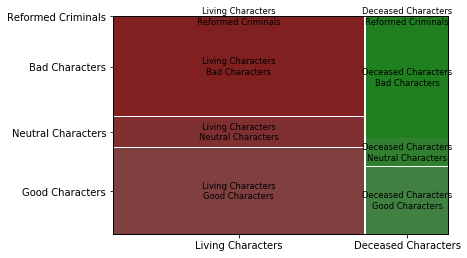

In [261]:
df = pd.crosstab(comic_characters['align'], comic_characters['alive'])
t = mosaic(comic_characters, ['alive','align'])

### Comment:
* It is obvious that 'Living characters' takes the majority. Within 'Living Characters', many of them are either Good or bad. Neutral and Reformed Criminals are not so common here. Within 'Deceased Characters', the case is quite similar, which means that 'Good' and 'Bad' are the most common alignment types.

### <font color="magenta">Q8: Conduct a $\chi^2$ test of ```align``` and ```alive```. Please specify your (null and alternative) hypotheses and explain your findings.

In [259]:
print(comic_characters['align'].unique())
print(comic_characters['alive'].unique())
df = pd.crosstab(comic_characters['align'], comic_characters['alive'])
print(df)

chi2, p, dof, ex = chi2_contingency(df)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ", dof)
print("Expected:")
pd.DataFrame(ex)

['Good Characters' 'Neutral Characters' 'Bad Characters' nan
 'Reformed Criminals']
['Living Characters' 'Deceased Characters' nan]
alive               Deceased Characters  Living Characters
align                                                     
Bad Characters                     2732               6882
Good Characters                    1513               5954
Neutral Characters                  635               2138
Reformed Criminals                    1                  2
chi2 =  155.7767360980558
p-val =  1.4943918171359524e-33
degree of freedom =  3
Expected:


,0,1
0,2363.193534,7250.806466
1,1835.444780,5631.555220
2,681.624263,2091.375737
3,0.737423,2.262577


### Comment:
* Chi-square test would test how likely it is that an observed distribution is due to chance. It measures how well the observed distribution of data fits with the distribution that is expected if the variables are independent. The test compares the observed data to a model that distributes the data according to the expectation that the variables are independent.
* If the observed data doesn't fit the model, the likelihood that the variables are dependent becomes stronger, thus proving the null hypotheses incorrect.
* Here categorical variables 'align' and 'alive' are divided into categories.
* The null hypothesis for Chi-square is that variables 'align' and 'alive' are independent. And the alternative is that they are correlated. Here our degree of freedom is 3 and the corresponding p-value is much smaller than 0.05. This indicates that we would reject the null hypotheses and categorical variables 'align' and 'alive' are correlated. The expected distribution has also been shown above through Chi-test.

An Useful website: https://www.ling.upenn.edu/~clight/chisquared.htm